# Plan 

# Data observation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img 
import os
from PIL import Image

In [3]:
DATA_PATH = "../data/huge data/"

In [43]:
df = pd.read_csv(DATA_PATH + "raw data/data.csv")

In [45]:
display(df.head())

,Folder,Id,Field,Well,CoringTop,CoringDown,CoringTopBind,CoringDownBind,CoreRecovery,PhotoTop,PhotoDown,PhotoType,LayerTop,LayerDown,Rock,Carbonate,Ruin,Saturation
0,Unload1,1000000,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,0.00,1.00,ДС,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
1,Unload1,1000001,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,0.00,1.00,УФ,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
2,Unload1,1000002,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.00,1.45,ДС,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
3,Unload1,1000003,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.00,1.45,УФ,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
4,Unload1,1000004,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.45,2.00,ДС,1.45,3.54,алевролит,не карбонатный,не разрушен,не опред.


In [47]:
df.shape

(6414, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Data columns (total 18 columns):
Folder            6414 non-null object
Id                6414 non-null int64
Field             6414 non-null object
Well              6414 non-null object
CoringTop         6414 non-null float64
CoringDown        6414 non-null float64
CoringTopBind     6414 non-null float64
CoringDownBind    6414 non-null float64
CoreRecovery      6414 non-null float64
PhotoTop          6414 non-null float64
PhotoDown         6414 non-null float64
PhotoType         6414 non-null object
LayerTop          6414 non-null float64
LayerDown         6414 non-null float64
Rock              6414 non-null object
Carbonate         6414 non-null object
Ruin              6414 non-null object
Saturation        6414 non-null object
dtypes: float64(9), int64(1), object(8)
memory usage: 902.1+ KB


In [6]:
display(df.describe())

,Id,CoringTop,CoringDown,CoringTopBind,CoringDownBind,CoreRecovery,PhotoTop,PhotoDown,LayerTop,LayerDown
count,6.414000e+03,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000
mean,1.002138e+06,2550.285678,2563.308544,2460.439529,2473.149953,12.740711,6.085538,6.706851,4.798422,7.968268
std,1.464913e+03,640.279915,641.503499,787.696835,790.103011,4.120460,4.357954,4.363185,4.342573,4.762334
min,1.000000e+06,784.000000,791.000000,0.000000,0.000000,0.840000,0.000000,0.110000,0.000000,0.110000
25%,1.000858e+06,2401.000000,2419.000000,2319.800000,2332.800000,9.000000,2.490000,3.000000,0.790000,4.120000
50%,1.001792e+06,2747.000000,2763.000000,2742.600000,2760.600000,11.980000,5.340000,5.980000,3.860000,7.300000
75%,1.003398e+06,2914.000000,2926.000000,2916.600000,2928.600000,17.000000,8.967500,9.650000,7.590000,11.197500
max,1.005005e+06,3495.000000,3500.000000,3495.000000,3500.000000,18.150000,17.920000,18.150000,17.920000,18.150000


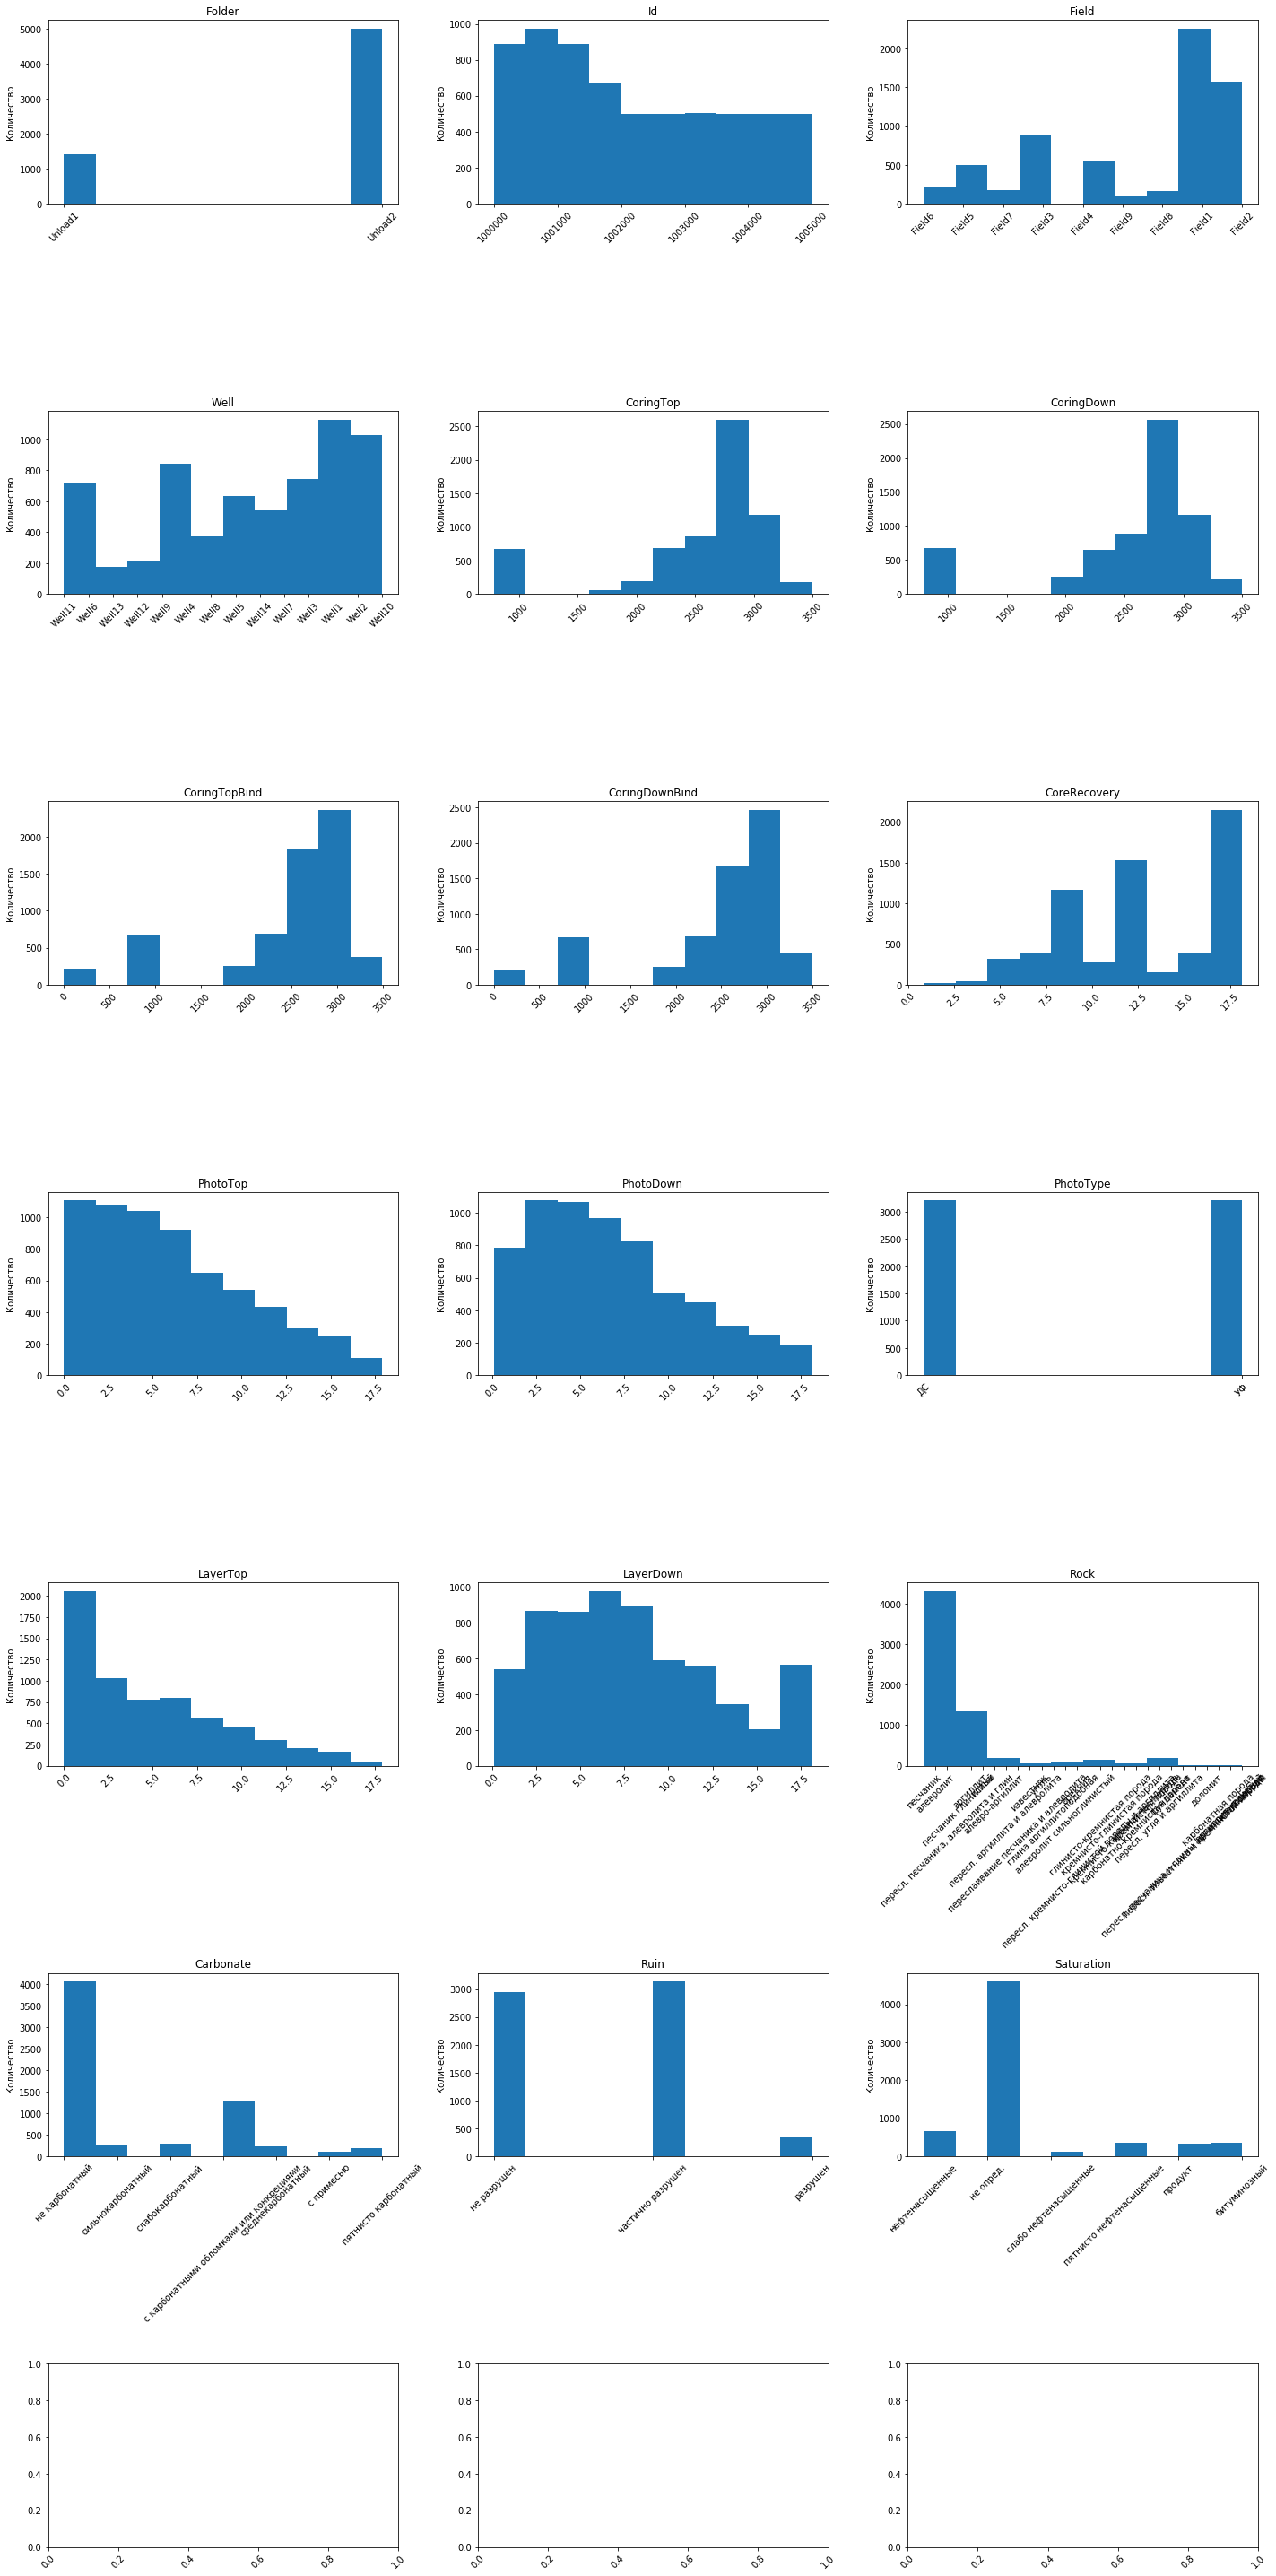

In [7]:
y_len = 7       # Number of plots on y axe.
x_len = 3         # Number of plots on x axe.
cur_column = 0     # Columns iterator.
columns = list(df.columns)

fig, axs = plt.subplots(y_len, x_len, figsize = (20,40))


for i in range(y_len):
    for j in range(x_len):
        if (cur_column > (len(columns)-1)):
            break
        axs[i, j].hist(df[columns[cur_column]])
        axs[i, j].set_title(columns[cur_column]) 
        axs[i, j].set_ylabel("Количество") 
        cur_column += 1

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
display(df["Rock"].value_counts())

песчаник                                          2482
аргиллит                                          1220
алевролит                                         1138
пересл. песчаника, алевролита и глин               686
кремнистая порода                                  156
переслаивание песчаника и алевролита               140
песчаник глинистый                                 112
глинисто-кремнистая порода                          78
кремнисто-глинистая порода                          64
глина аргиллитоподобная                             62
карбонатно-кремнистая порода                        56
уголь                                               42
пересл. аргиллита и алевролита                      36
фундамент                                           32
алевролит сильноглинистый                           24
алевро-аргиллит                                     18
известняк                                           16
кремнисто-карбонатная порода                        12
пересл. пе

In [9]:
display(df["Carbonate"].value_counts())

не карбонатный                              4056
с карбонатными обломками или конкрециями    1292
слабокарбонатный                             298
сильнокарбонатный                            246
среднекарбонатный                            226
пятнисто карбонатный                         196
с примесью                                   100
Name: Carbonate, dtype: int64

In [10]:
display(df["Ruin"].value_counts())

частично разрушен    3132
не разрушен          2944
разрушен              338
Name: Ruin, dtype: int64

In [11]:
display(df["Saturation"].value_counts())

не опред.                   4596
нефтенасыщенные              668
пятнисто нефтенасыщенные     358
битуминозный                 350
продукт                      326
слабо нефтенасыщенные        116
Name: Saturation, dtype: int64

#  Training

## Common parts

Adding "PhotoTop" and "PhotoDown" difference column.

In [48]:
top_list = list(df["PhotoTop"])
down_list = list(df["PhotoDown"])
difference = list(np.array(down_list) - np.array(top_list))

In [49]:
df.insert(11, "PhotoDifference", difference)

In [55]:
display(df.head())

,Folder,Id,Field,Well,CoringTop,CoringDown,CoringTopBind,CoringDownBind,CoreRecovery,PhotoTop,PhotoDown,PhotoDifference,PhotoType,LayerTop,LayerDown,Rock,Carbonate,Ruin,Saturation
0,Unload1,1000000,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,0.00,1.00,1.00,ДС,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
1,Unload1,1000001,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,0.00,1.00,1.00,УФ,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
2,Unload1,1000002,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.00,1.45,0.45,ДС,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
3,Unload1,1000003,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.00,1.45,0.45,УФ,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
4,Unload1,1000004,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.45,2.00,0.55,ДС,1.45,3.54,алевролит,не карбонатный,не разрушен,не опред.


In [58]:
len(df[df["PhotoDifference"] < 0.2])

986

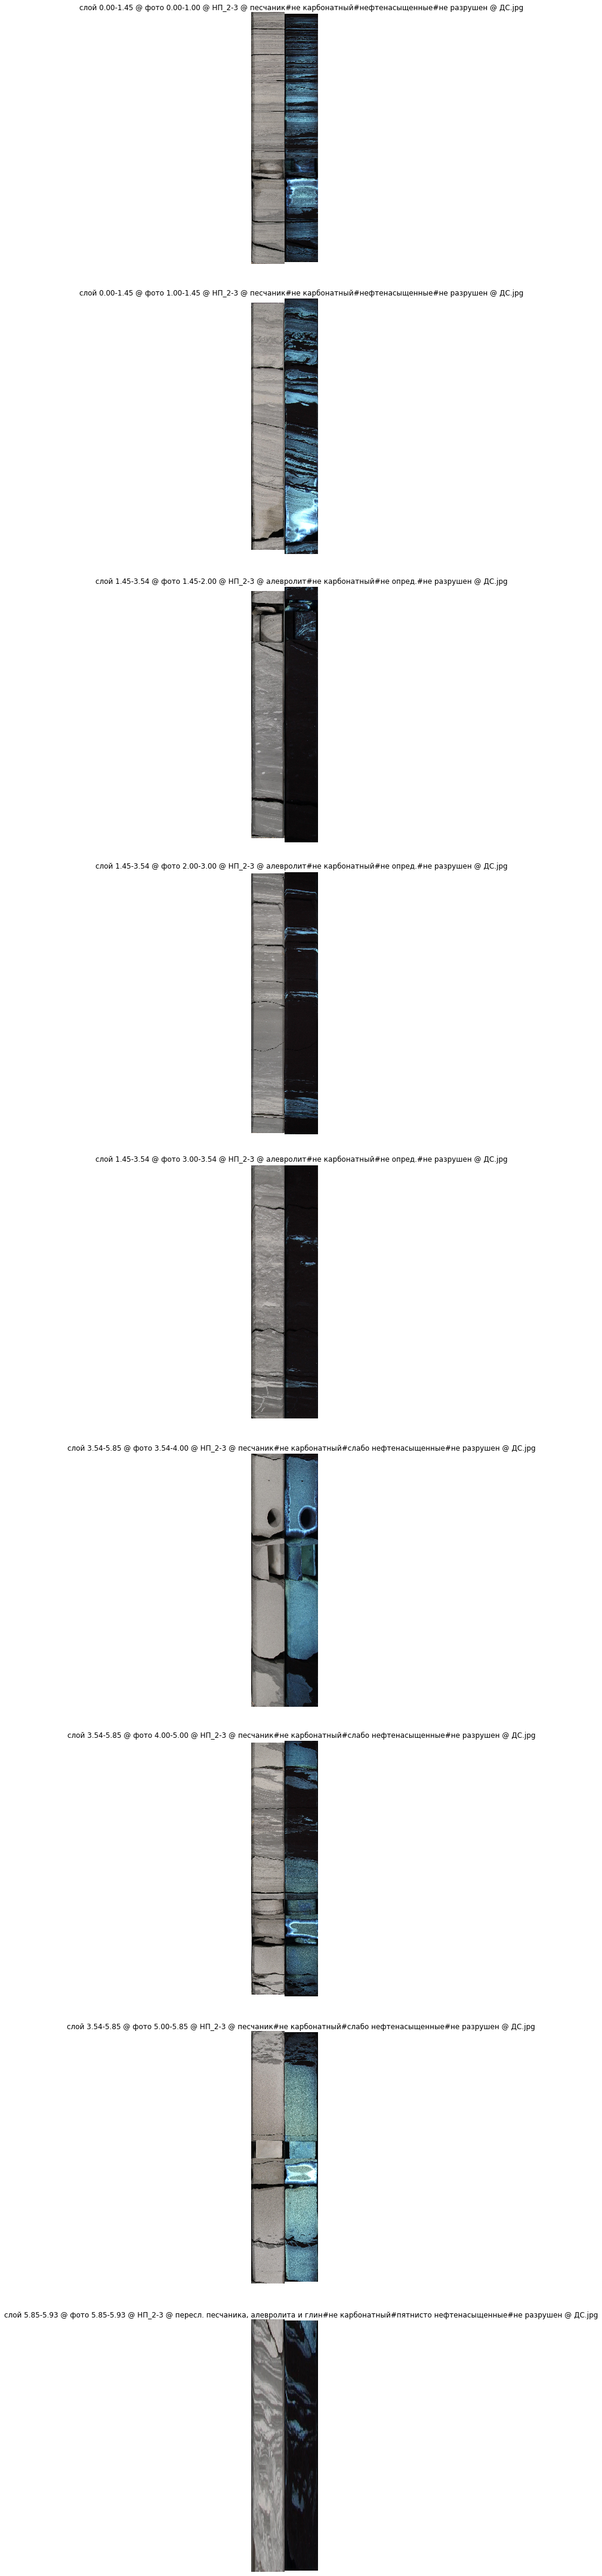

In [25]:
y_len = 9          # Number of plots on y axe.
x_len = 2          # Number of plots on x axe.
cur_column = 0     # Columns iterator.

fig, ax = plt.subplots(y_len, x_len, figsize = (2,80))

for i in range(y_len):
    ax[i, j].title.set_text(images_paths[cur_column])
    for j in range(x_len):
        im = Image.open(IMAGES_PATH + images_paths[cur_column]) 
        im = im.resize((im.size[0], 3000))
        ax[i, j].imshow(im)
        ax[i, j].axis('off')
        cur_column += 1

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

##  Rock

### Requirements 

What have to be done:
- Rock type with 20cm accuracy
- Interensting rock types: "песчаник", "аргиллит", "алевролит", "переслой"
- Exact "переслой", but for baseline enough "переслой" existance up to 5cm and 2cm
- Rock type between photos.

### Plan 

What we will do now:
- Rock type with 20cm accuracy
- Interensting rock types: "песчаник", "аргиллит", "алевролит", "переслой"
- "переслой" existance up to 5cm

How we will do it:
1. Cut images so their length is 20 cm
2. Compare these methods:
 - Train net only on non-UV pictures
 - Train net only on UV pictures
 - Make some combination of UV and non-UV nets outputs
 - Train net on both UV and non-UV pictures

Maybe there's need in trying data augmentation.

### Solution 

In [13]:
display(df["Rock"].value_counts())

песчаник                                          2482
аргиллит                                          1220
алевролит                                         1138
пересл. песчаника, алевролита и глин               686
кремнистая порода                                  156
переслаивание песчаника и алевролита               140
песчаник глинистый                                 112
глинисто-кремнистая порода                          78
кремнисто-глинистая порода                          64
глина аргиллитоподобная                             62
карбонатно-кремнистая порода                        56
уголь                                               42
пересл. аргиллита и алевролита                      36
фундамент                                           32
алевролит сильноглинистый                           24
алевро-аргиллит                                     18
известняк                                           16
кремнисто-карбонатная порода                        12
пересл. пе

### Add later 

What can be done later:
- Rock type between photos.
- Exact "переслой"
- "переслой" range up to 5cm and 2cm

## Carbonate

## Ruin 

## Saturation

# Using model 